In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

In [138]:
#Get data from Alpha Vantage using API request

url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}



response = requests.get(url, params=params)
data = response.json()

def df_from_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def convert_response(d):
        # convert the response into datetimerecords that can be
        # parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    # pass your response 'page'
    df = pd.DataFrame(convert_response(data))
    # rename the columns    
    df = df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    # extract the default columns
    df = df[columns]
    return df

df = df_from_response(data)
df.reset_index(level=0, inplace=True)
df.head()
# df = pd.DataFrame({'dates':pd.date_range('2018-01-01','2019-01-01')})
# newfd = df.columns = ['date' if x=='datetime' else x for x in df.columns]
# nf_h = pd.DataFrame(newfd)
# print('Data Frame:', nf_h)

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [139]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date        datetime64[ns]
Open                object
High                object
Low                 object
Close               object
AdjClose            object
Volume              object
dtype: object

In [140]:
df = df.set_index('date')
df.head(3)

,Open,High,Low,Close,AdjClose,Volume
date,,,,,,
1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600


In [141]:
df.index

DatetimeIndex(['1998-01-02', '1998-01-05', '1998-01-06', '1998-01-07',
               '1998-01-08', '1998-01-09', '1998-01-12', '1998-01-13',
               '1998-01-14', '1998-01-15',
               ...
               '2019-02-15', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01'],
              dtype='datetime64[ns]', name='date', length=5324, freq=None)

In [142]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2001-06-04,57.5000,57.5800,56.5000,57.4600,19.5883,992300,2001,6,Monday
1998-03-05,79.0000,79.4400,78.6300,79.1900,12.9928,914900,1998,3,Thursday
2000-09-11,54.0000,55.0600,53.5600,55.0000,18.5878,1758300,2000,9,Monday
2017-08-28,71.2800,71.3300,70.6550,70.9000,68.3573,3086638,2017,8,Monday
2015-09-10,62.2800,62.4800,61.3100,61.9300,57.1031,5223877,2015,9,Thursday


In [143]:
df.loc['2017-08-28']

Open            71.2800
High            71.3300
Low             70.6550
Close           70.9000
AdjClose        68.3573
Volume          3086638
Year               2017
Month                 8
Weekday Name     Monday
Name: 2017-08-28 00:00:00, dtype: object

In [144]:
df.loc['2014-01-20':'2014-01-22']

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2014-01-21,65.0500,65.4100,64.2900,64.7400,57.4747,2828700,2014,1,Tuesday
2014-01-22,64.5400,64.7000,63.8700,64.0100,57.1285,2323200,2014,1,Wednesday


In [145]:
df.loc['2000'].head()

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2000-01-03,64.0000,64.0000,62.0000,62.2500,20.8681,1217400,2000,1,Monday
2000-01-04,61.2500,61.9400,60.5000,60.6300,20.3250,1179200,2000,1,Tuesday
2000-01-05,60.7500,61.2500,58.5000,58.6300,19.6545,1584700,2000,1,Wednesday
2000-01-06,58.0000,60.0000,57.8800,58.4400,19.5908,2901100,2000,1,Thursday
2000-01-07,59.1300,62.3100,58.0000,61.9400,20.7641,2785100,2000,1,Friday


In [146]:
df.loc['2000-09'].head()

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2000-09-01,51.6300,52.1300,51.2500,51.8100,17.5097,832300,2000,9,Friday
2000-09-05,51.5600,52.4400,50.8800,52.1300,17.6178,1129700,2000,9,Tuesday
2000-09-06,52.8800,54.7500,52.8800,54.6300,18.4627,2723500,2000,9,Wednesday
2000-09-07,54.5600,54.5600,52.6900,53.3100,18.0166,1846900,2000,9,Thursday
2000-09-08,53.0600,54.4400,52.8800,54.0600,18.2701,1751400,2000,9,Friday


In [147]:
import matplotlib.pyplot as plt

# Display figures inline in Jupyter notebook
%matplotlib inline

In [148]:
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

NameError: name 'plot' is not defined

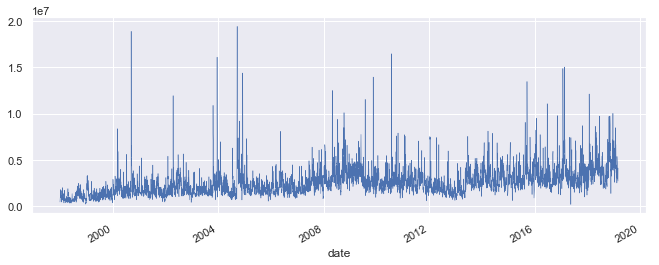

In [247]:
df.Volume=pd.to_numeric(df.Volume)
df['Volume'].plot(linewidth=0.5);
plot.set_ylabel('Crude Oil - Closing Prices ($)')
plot.set_title('Daily Crude Oil Stock Prices from 07/2001 - 09/2001')

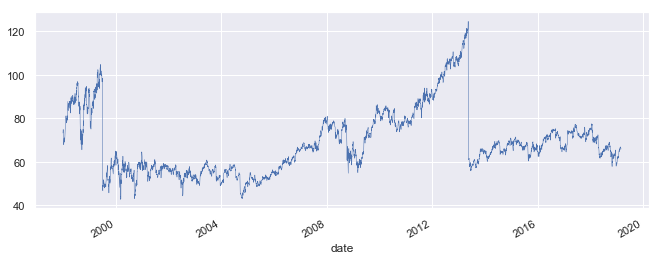

In [150]:
df.Close=pd.to_numeric(df.Close)
df['Close'].plot(linewidth=0.5);

The trend line for the plot above reveals that crude oil stocks bottomed out between 2000 and 20001 and remained flat for several years after.

#### Dot Plot - Crude Oil Stocks 2000-2019

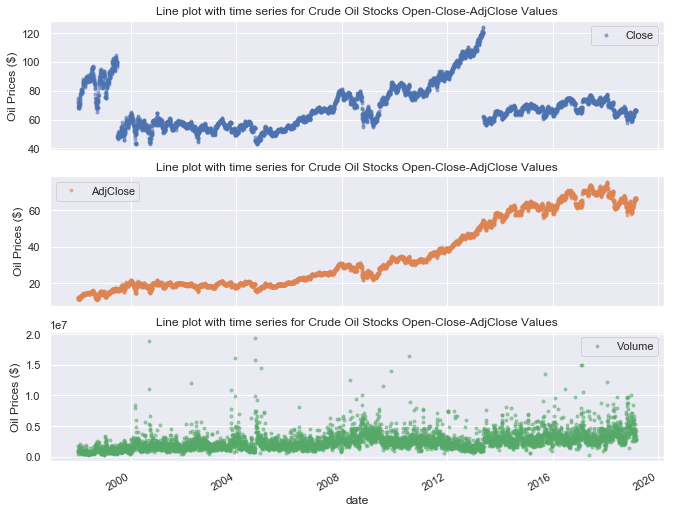

In [253]:
cols_plot = ['Close', 'AdjClose', 'Volume']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Oil Prices ($)')
    ax.set_title('Line plot with time series for Crude Oil Stocks Open-Close-AdjClose Values')

The 3 plots above provides with interesting patterns. Strong fluctuations of the prices troughout the years.Slight increases in volume as well.

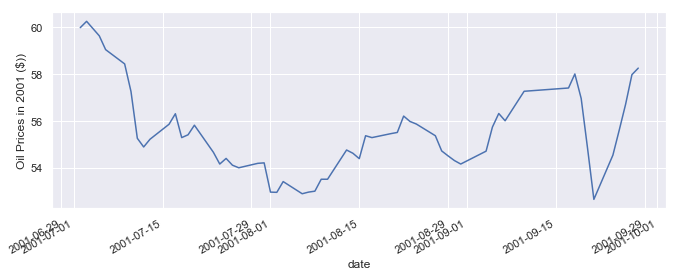

In [159]:
ax = df.loc['2001-07-01':'2001-09-30', 'Close'].plot()
ax.set_ylabel('Oil Prices in 2001 ($))');
ax.set_title('Line plot with time series for Crude Oil Stocks Open-Close-AdjClose Values')

The trend line for the plot above suggest that crude oil stocks were decre 

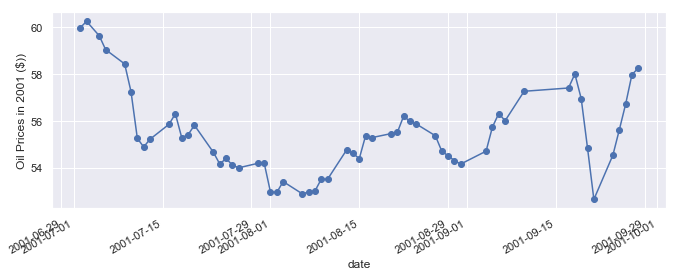

In [160]:
ax = df.loc['2001-07-01':'2001-09-30', 'Close'].plot(marker='o', linestyle='-')
ax.set_ylabel('Oil Prices in 2001 ($))');

In [161]:
import matplotlib.dates as mdates

#### Weekly Line Plot - Crude Oil Stocks 07/2001 - 09/2001

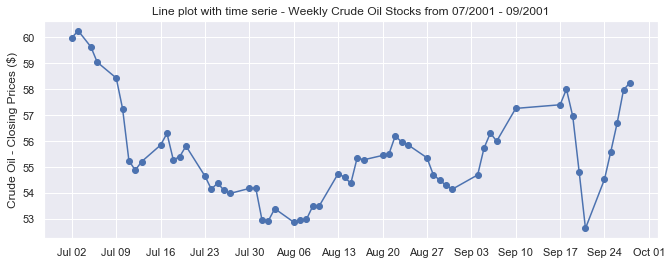

In [255]:
fig, ax = plt.subplots()
ax.plot(df.loc['2001-07-01':'2001-09-30', 'Close'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line plot with time serie - Weekly Crude Oil Stocks from 07/2001 - 09/2001')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The line plot reveals the decrease of oil prices within the 2 months prior to 9-11.

In [163]:
# df.Month=pd.to_numeric(df.Month)
# fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
# for name, ax in zip(['Open', 'Close', 'AdjClose'], axes):
#     sns.boxplot(data=df, x='Month', y=name, ax=ax)
#     ax.set_ylabel('Prices')
#     ax.set_title(name)

#     # Remove the automatic x-axis label from all but the bottom subplot
#     if ax != axes[-1]:
#         ax.set_xlabel('')

In [164]:
pd.date_range('2001-07-01','2001-09-30', freq='D') 

DatetimeIndex(['2001-07-01', '2001-07-02', '2001-07-03', '2001-07-04',
               '2001-07-05', '2001-07-06', '2001-07-07', '2001-07-08',
               '2001-07-09', '2001-07-10', '2001-07-11', '2001-07-12',
               '2001-07-13', '2001-07-14', '2001-07-15', '2001-07-16',
               '2001-07-17', '2001-07-18', '2001-07-19', '2001-07-20',
               '2001-07-21', '2001-07-22', '2001-07-23', '2001-07-24',
               '2001-07-25', '2001-07-26', '2001-07-27', '2001-07-28',
               '2001-07-29', '2001-07-30', '2001-07-31', '2001-08-01',
               '2001-08-02', '2001-08-03', '2001-08-04', '2001-08-05',
               '2001-08-06', '2001-08-07', '2001-08-08', '2001-08-09',
               '2001-08-10', '2001-08-11', '2001-08-12', '2001-08-13',
               '2001-08-14', '2001-08-15', '2001-08-16', '2001-08-17',
               '2001-08-18', '2001-08-19', '2001-08-20', '2001-08-21',
               '2001-08-22', '2001-08-23', '2001-08-24', '2001-08-25',
      

In [165]:
pd.date_range('2001-09-11', periods=8, freq='H')

DatetimeIndex(['2001-09-11 00:00:00', '2001-09-11 01:00:00',
               '2001-09-11 02:00:00', '2001-09-11 03:00:00',
               '2001-09-11 04:00:00', '2001-09-11 05:00:00',
               '2001-09-11 06:00:00', '2001-09-11 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [166]:
df.index

DatetimeIndex(['1998-01-02', '1998-01-05', '1998-01-06', '1998-01-07',
               '1998-01-08', '1998-01-09', '1998-01-12', '1998-01-13',
               '1998-01-14', '1998-01-15',
               ...
               '2019-02-15', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01'],
              dtype='datetime64[ns]', name='date', length=5324, freq=None)

In [178]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2001-08-15', '2001-09-10', '2001-09-20'])

# Select the specified dates and just the Consumption column
consum_sample = df.loc[times_sample, ['Close']].copy()
consum_sample

,Close
2001-08-15,54.38
2001-09-10,57.26
2001-09-20,54.83


In [180]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')

# Create a column with missings forward filled
consum_freq['Close - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq.head()

,Close,Close - Forward Fill
2001-08-15,54.38,54.38
2001-08-16,NaN,54.38
2001-08-17,NaN,54.38
2001-08-18,NaN,54.38
2001-08-19,NaN,54.38


In [189]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
df.Open=pd.to_numeric(df.Open)
df.AdjClose=pd.to_numeric(df.AdjClose)

data_columns = ['Open', 'Close', 'AdjClose', 'Volume']

# Resample to weekly frequency, aggregating with mean
df_weekly_mean = df[data_columns].resample('W').mean()
df_weekly_mean.head()

,Open,Close,AdjClose,Volume
date,,,,
1998-01-04,74.500,73.25,11.970600,451500.0
1998-01-11,71.964,71.24,11.642080,1100520.0
1998-01-18,68.600,69.04,11.282560,1273480.0
1998-01-25,70.110,69.89,11.432725,909625.0
1998-02-01,70.902,71.50,11.731100,1019180.0


In [190]:
print(df.shape[0])
print(df_weekly_mean.shape[0])

5324
1105


#### Line Plot with Frequency and Resampling Functions - Crude Oil 07/2001 - 09/2001

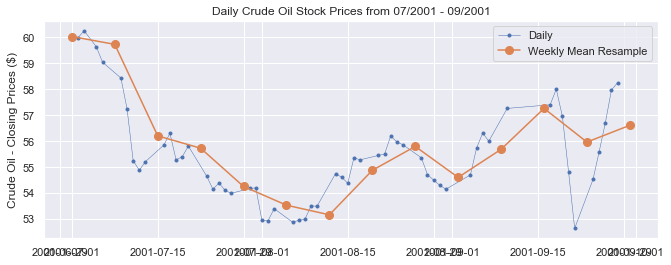

In [197]:
# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Daily Crude Oil Stock Prices from 07/2001 - 09/2001')
ax.legend();

The trend line reveals that oil prices reached a sharp decline in the months prior to 9-11. And it remained flat for several years after.

In [258]:
# # Compute the monthly sums, setting the value to NaN for any month which has
# # fewer than 28 days of data
# df_monthly = df[data_columns].resample('M').sum(min_count=28)
# df_monthly.tail(10)

In [257]:
# fig, ax = plt.subplots()
# ax.plot(df_monthly['Open'], color='black', label='Open')
# df_monthly[['Close', 'AdjClose']].plot.area(ax=ax, linewidth=0)

# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.legend()
# ax.set_ylabel('Monthly Total (Oil Prices)');

In [259]:
# # Compute the annual sums, setting the value to NaN for any year which has
# # fewer than 360 days of data
# df_annual = df[data_columns].resample('A').sum(min_count=360)

# # The default index of the resampled DataFrame is the last day of each year,
# # ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# # to the year component
# df_annual = df_annual.set_index(df_annual.index.year)
# df_annual.index.name = 'Year'

# # Compute the ratio of Wind+Solar to Consumption
# df_annual['Open/Close'] = df_annual['Open'] / df_annual['Close']
# df_annual.tail(3)

In [260]:
# # Plot from 2012 onwards, because there is no solar production data in earlier years
# ax = df_annual.loc[2012:, 'Open/Close'].plot.bar(color='C0')
# ax.set_ylabel('Fraction')
# ax.set_ylim(0, 0.3)
# ax.set_title('Division of Open and Close Price')
# plt.xticks(rotation=0);

In [261]:
# Compute the centered 7-day rolling mean
df_7d = df[data_columns].rolling(7, center=True).mean()
df_7d.head(10)

,Open,Close,AdjClose,Volume
date,,,,
1998-01-02,NaN,NaN,NaN,NaN
1998-01-05,NaN,NaN,NaN,NaN
1998-01-06,NaN,NaN,NaN,NaN
1998-01-07,71.652857,71.047143,11.610571,1.043586e+06
1998-01-08,70.732857,70.297143,11.488000,1.150714e+06
1998-01-09,69.911429,69.520000,11.361000,1.280214e+06
1998-01-12,69.125714,69.127143,11.296800,1.307171e+06
1998-01-13,69.090000,68.992857,11.274857,1.301900e+06
1998-01-14,68.937143,69.180000,11.305443,1.282314e+06


#### Line Plot with Frequency, Resampling and Rolling Mean Functions - Crude Oil 07/2001 - 09/2001

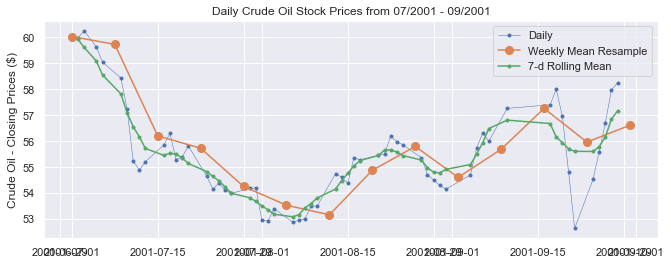

In [262]:
# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(df_7d.loc[start:end, 'Close'],
        marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Daily Crude Oil Stock Prices from 07/2001 - 09/2001')
ax.legend();

The trend line reveals that oil prices reached a sharp decline in the months prior to 9-11. And it remained flat for several years after.

In [224]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# Open and AdjClose Prices time series

df_365d = df[data_columns].rolling(window=365, center=True, min_periods=360).mean()

#### Rolling Means Trends plot - Crude Oil 07/2001 - 09/2001

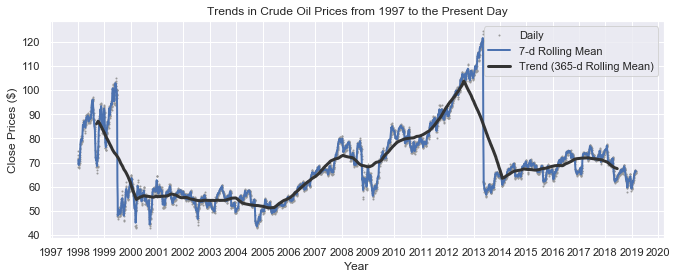

In [226]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(df['Close'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily')

ax.plot(df_7d['Close'], linewidth=2, label='7-d Rolling Mean')

ax.plot(df_365d['Close'], color='0.2', linewidth=3,
        label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Close Prices ($)')
ax.set_title('Trends in Crude Oil Prices from 1997 to the Present Day');

The trend line reveals that oil prices reached a sharp decline in the months prior to 9-11. And it remained flat for several years after.

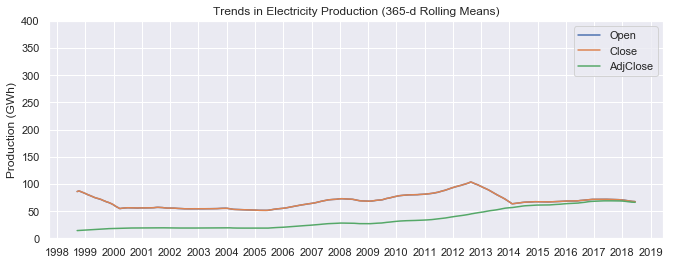

In [240]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Open', 'Close', 'AdjClose']:
    ax.plot(df_365d[nm], label=nm)

# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)');